## Get the Data

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

Read the .csv file and store it in a Pandas dataframe

In [ ]:
data = pd.read_csv('QueryResults.csv')
data.columns = ['DATE', 'TAG', 'posts']

Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
data.head()

,DATE,TAG,posts
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,506
4,2008-08-01 00:00:00,c++,164


Check the dimensions of the dataframe

In [ ]:
data.shape

(2356, 3)

In [ ]:
type(data)

pandas.core.frame.DataFrame

Calculate the total number of post per language.

In [ ]:
grouped_df = data.groupby('TAG')
grouped_df.sum()

,posts
TAG,
assembly,41204
c,385756
c#,1560354
c++,777218
delphi,50104
go,64697
java,1867038
javascript,2428715
perl,67154


How many months of data exist per language? Which language had the fewest months with an entry? 


In [ ]:
grouped_df.count()

,DATE,posts
TAG,,
assembly,170,170
c,170,170
c#,171,171
c++,170,170
delphi,170,170
go,155,155
java,170,170
javascript,170,170
perl,170,170


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
data.DATE = pd.to_datetime(data.DATE, format='%Y-%m-%d')

In [ ]:
data.head()

,DATE,TAG,posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,506
4,2008-08-01,c++,164


## Data Manipulation



In [ ]:
reshaped_df = data.pivot(index='DATE', columns='TAG', values='posts')

In [ ]:
reshaped_df.shape

(171, 14)

In [ ]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,506.0,164.0,14.0,NaN,222.0,164.0,28.0,159.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1647.0,753.0,104.0,NaN,1133.0,636.0,130.0,477.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1989.0,809.0,112.0,NaN,1149.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1732.0,734.0,141.0,NaN,957.0,582.0,97.0,501.0,451.0,1.0,159.0,NaN


In [ ]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,506.0,164.0,14.0,0.0,222.0,164.0,28.0,159.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,318.0,1647.0,753.0,104.0,0.0,1133.0,636.0,130.0,477.0,537.0,6.0,287.0,0.0
2008-10-01,15.0,303.0,1989.0,809.0,112.0,0.0,1149.0,724.0,127.0,612.0,508.0,0.0,247.0,0.0
2008-11-01,17.0,259.0,1732.0,734.0,141.0,0.0,957.0,582.0,97.0,501.0,451.0,1.0,159.0,0.0


Count the number of entries per programming language. 

In [ ]:
data.groupby('TAG').sum()

,posts
TAG,
assembly,41204
c,385756
c#,1560354
c++,777218
delphi,50104
go,64697
java,1867038
javascript,2428715
perl,67154


In [ ]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


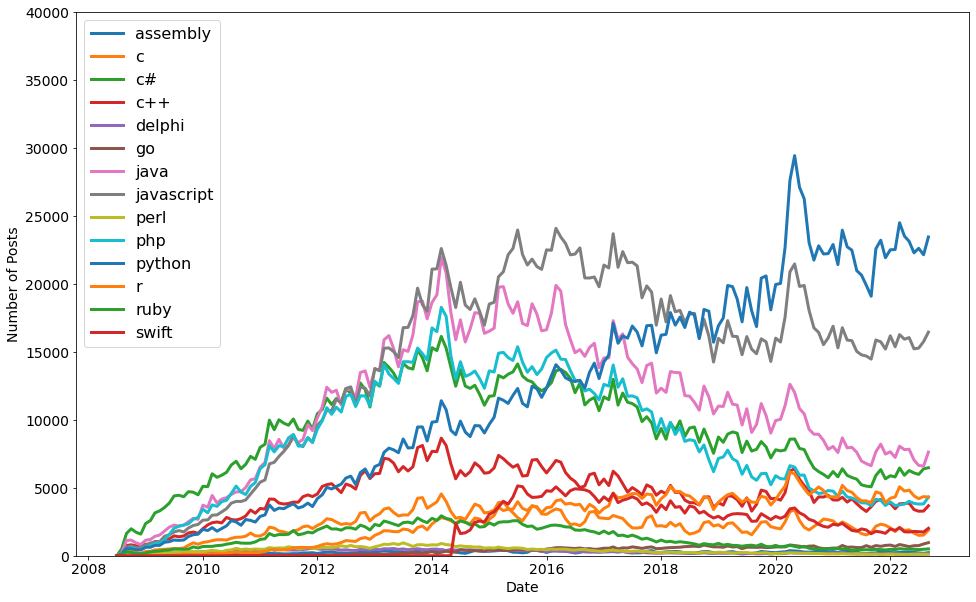

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 40000)

for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)  

plt.legend(fontsize=16)   

# Smoothing out Time Series Data

 To better see a trend we can plot an average of, say 6 or 12 observations. 

In [ ]:
roll_df = reshaped_df.rolling(window=6).mean()

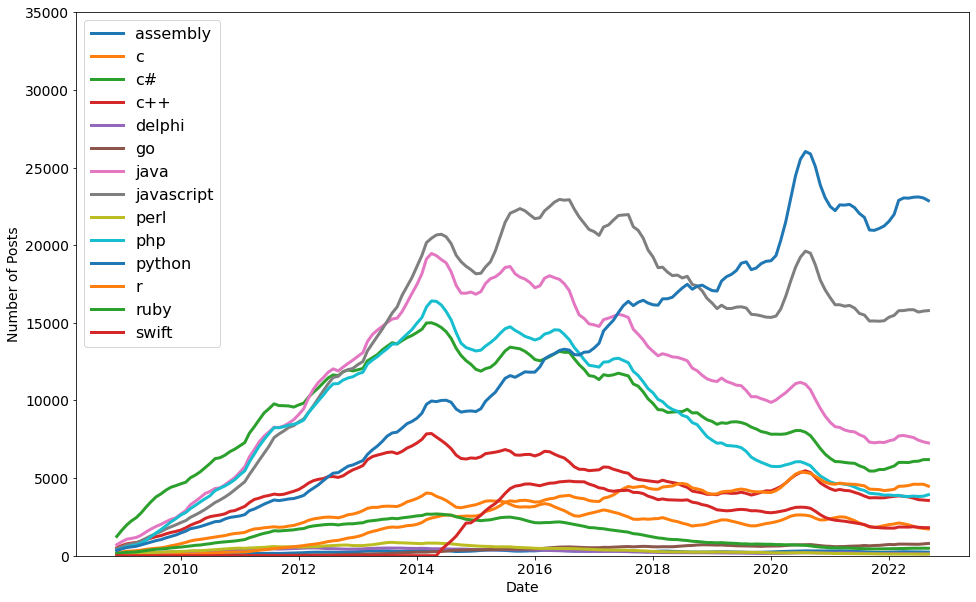

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)